# Experiments with the bivariate Gaussian

In this notebook, we'll get a feel for the two-dimensional Gaussian by varying the covariance matrix, drawing random samples from the resulting distribution, and plotting contour lines of the density.

We begin, as always, by loading in standard packages.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
# installing packages for interactive graphs
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider

The function **bivariate_plot** takes as input three parameters that uniquely specify a 2x2 covariance matrix:
* `var1`, the variance of the first feature, `x1`
* `var2`, the variance of the second feature, `x2`
* `corr`, the correlation between `x1` and `x2`

It then depicts a 2-d Gaussian whose mean is the origin and whose covariance matrix is given by these parameters. The display consists of 100 points randomly sampled from the Gaussian, as well as three representative contour lines of the density.

The first line below, **interact_manual**, sets up an interactive widget that allows you to specify the parameters to **bivariate_plot** using sliders, and provides a button to execute the function.

In [2]:
@interact_manual(std1 = (1,5), std2 = (1,5), corr=(-0.999,0.999,0.001))
def bivariate_plot(std1, std2, corr):
    #
    # Set parameters of Gaussian
    var1, var2 = std1**2, std2**2
    mu = [0,0]
    covariance = corr * np.sqrt(var1) * np.sqrt(var2)
    sigma = [[var1,covariance], [covariance,var2]]
    np.set_printoptions(precision=2)
    print("Covariance matrix:")
    print(np.around(sigma, decimals=2))
    #
    # Draw samples from the distribution
    n = 100
    x = np.random.multivariate_normal(mu,sigma,size=n)
    #
    # Set up a plot for the samples and the density contours
    lim = 10.0
    plt.xlim(-lim, lim) # limit along x1-axis
    plt.ylim(-lim, lim) # limit along x2-axis    
    plt.axes().set_aspect('equal', 'datalim')
    #
    # Plot the sampled points as blue dots
    plt.plot(x[:,0], x[:,1], 'bo')
    #
    # To display contour lines, first define a fine grid
    res = 200
    xg = np.linspace(-lim, lim, res)
    yg = np.linspace(-lim, lim, res)
    z = np.zeros((res,res))
    # Compute the density at each grid point
    rv = multivariate_normal(mean=mu, cov=sigma)
    for i in range(0,res):
        for j in range(0,res):
            z[j,i] = rv.logpdf([xg[i], yg[j]]) 
    sign, logdet = np.linalg.slogdet(sigma)
    normalizer = -0.5 * (2 * np.log(6.28) + sign * logdet)
    # Now plot a few contour lines of the density
    for offset in range(1,4):
        plt.contour(xg,yg,z, levels=[normalizer - offset], colors='r', linewidths=2.0, linestyles='solid')

    # Finally, display
    plt.show()
    return mu, std1, std2, var1, var2, sigma, rv, z

interactive(children=(IntSlider(value=3, description='std1', max=5, min=1), IntSlider(value=3, description='st…

## <font color="magenta">Quick exercise:</font>
Experiment with the widget above to get a sense for how the different parameters influence the shape of the Gaussian. In particular, figure out the answers to the following questions.
* Under what conditions does the Gaussian have contour lines that are perfect circles?
* Under what conditions is the Gaussian tilted upwards?
* Under what conditions is the Gaussian titled downwards?
* Suppose the Gaussian has no tilt, and the contour lines are stretched vertically, so that the vertical stretch is twice the horizontal stretch. What can we conclude about the covariance matrix?

*Note down the answers to these questions: you will enter them later, as part of this week's assignment.*

* Contour lines are perfect circles when correlation between the 2 variables is 0 and they have the same variances
* The Gaussian is tilted upward when the correlation is a positive number
* The Gaussian is tilted downward when the correlation is a negative number
* the covariance matrix is [[var1, 0], [0, var2]] and var2 = 4 * var1 (i.e. std2 = 2 * std1)

Covariance matrix:
[[ 4.   6.4]
 [ 6.4 16. ]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


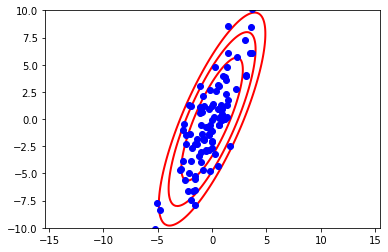

In [7]:
std1 = 2
std2 = 4
corr = 0.8
mu, std1, std2, var1, var2, sigma, rv, z = bivariate_plot(std1, std2, corr)

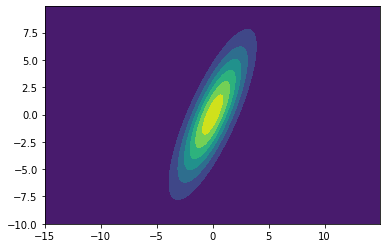

In [8]:
x, y = np.mgrid[-15:15:.1, -10:10:.1]
pos = np.dstack((x, y))

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos))
plt.show()

In [10]:
pos.shape

(300, 200, 2)